In [1]:
%matplotlib widget
from scipy.fft import fft, ifft, fftshift
from scipy import integrate,interpolate
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [3]:
## Parameter
alpha = 1       # thermal coefficent
L     = 15     # length of space domain
N     = 100     # space discritisation points
dx    = L / N
x     = np.arange(-L/2,L/2,dx)

## define the inital conditions
def initial_conditions(x):
    if(abs(x) < 2):
        return 1
    else:
        return 0

initial_conditions_vec = np.vectorize(initial_conditions)
u0 = initial_conditions_vec(x)

## calculate the wavenumbers for the derivative
kappa = (2*pi/L) * np.arange(-N/2,N/2)
kappa = fftshift(kappa)

def heatEquationFourierSpace(t,y):
    return - alpha**2 * kappa**2 * y

t = np.arange(0,10,0.1)


In [4]:
y_hat = integrate.solve_ivp(heatEquationFourierSpace, [0,10] ,fft(u0), t_eval = t)

y = np.zeros((y_hat.y.shape[0], y_hat.y.shape[1]))
for i in range(y_hat.t.shape[0]):
    y[:,i] =  np.real(ifft( y_hat.y[:,i]))

Text(0.5, 0, 'Temperature')

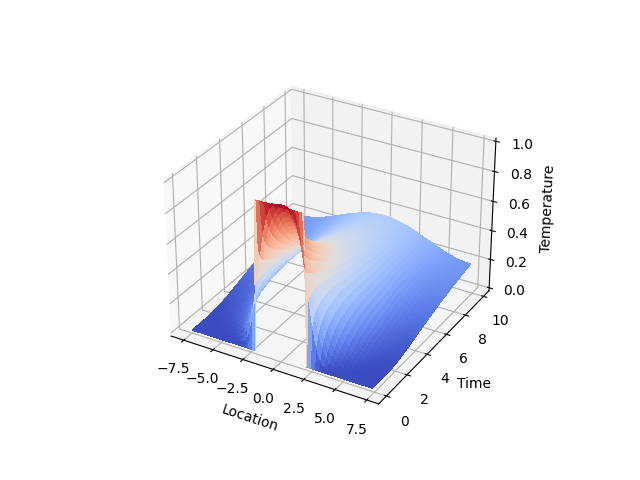

In [5]:
X,T = np.meshgrid(x,t)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, T, y.T,cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_ylabel('Time')
ax.set_xlabel('Location')
ax.set_zlabel('Temperature')